In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from spacy import displacy
from nltk.stem import WordNetLemmatizer


In [2]:
df = pd.read_csv('../data/San_Francisco_restaurant_reviews.csv')

In [3]:
df.shape

(50000, 5)

In [4]:
df.head()

,Unnamed: 0,restaurant_name,restaurant_rating,customer_rating,review_text
0,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I&#39;ve dined here at lea...
1,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...
2,2,Brenda's French Soul Food,4.0,2,Hadn&#39;t been here in years because the neig...
3,3,Brenda's French Soul Food,4.0,3,I love the other Brenda&#39;s in SF but this o...
4,4,Brenda's French Soul Food,4.0,5,Another repeat visit and no disappointment fro...


In [5]:
# Rename column 'Unnamed: 0' to Review Id
df.rename(columns={'Unnamed: 0':'review_id'}, inplace = True)
df.head()

,review_id,restaurant_name,restaurant_rating,customer_rating,review_text
0,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I&#39;ve dined here at lea...
1,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...
2,2,Brenda's French Soul Food,4.0,2,Hadn&#39;t been here in years because the neig...
3,3,Brenda's French Soul Food,4.0,3,I love the other Brenda&#39;s in SF but this o...
4,4,Brenda's French Soul Food,4.0,5,Another repeat visit and no disappointment fro...


In [6]:
for row in df['review_text'][:5]:
    print(f'{row}\n')

Absolutely amazing. I&#39;ve dined here at least 6 times since moving to the Bay Area in February of 2022. Every experience has been great and those I recommended to eat here all let me know how good the food was as well.

So good we went twice in one week! After a recommendation from the barista by our hotel we walked over to Brenda&#39;s for brunch on a Saturday. <br><br>There was a wait but it moved quickly. I got the Florentine Benedict and my friend got the Corn Succotash &amp; White Cheddar Omelette (not pictured). Everything was great - savory, a little spice, comforting!<br><br> Friendly and quick service. I ended up going back to try the dinner menu a few nights later - the shrimp and grits was everything I wanted. The beignets are a must try - SO big and fluffy and filled to perfection.

Hadn&#39;t been here in years because the neighborhood has become increasingly rough and filthy and waiting for a table first thing in the morning under such circumstances isn&#39;t a good wa

- Need to change the string of characters ' & #39; ' into a " ' "
- Remove the break characters

In [36]:
def remove_html_characters(df):
    #removing break characters and html character references
    df['review_text'] = df['review_text'].str.replace('&#39;', "'")
    df['review_text'] = df['review_text'].str.replace('&#34;', '"')
    df['review_text'] = df['review_text'].str.replace('<br>', '')
    df['review_text'] = df['review_text'].str.replace('&amp;', '&')
    df['review_text'] = df['review_text'].str.replace(r'\<a.*a\>', '', regex=True)
    df['review_text'] = df['review_text'].str.replace('\xa0', '')


In [37]:
remove_html_characters(df)

In [38]:
for row in df['review_text'][:5]:
    print(f'{row}\n')

Absolutely amazing. I've dined here at least 6 times since moving to the Bay Area in February of 2022. Every experience has been great and those I recommended to eat here all let me know how good the food was as well.

So good we went twice in one week! After a recommendation from the barista by our hotel we walked over to Brenda's for brunch on a Saturday. There was a wait but it moved quickly. I got the Florentine Benedict and my friend got the Corn Succotash & White Cheddar Omelette (not pictured). Everything was great - savory, a little spice, comforting! Friendly and quick service. I ended up going back to try the dinner menu a few nights later - the shrimp and grits was everything I wanted. The beignets are a must try - SO big and fluffy and filled to perfection.

Hadn't been here in years because the neighborhood has become increasingly rough and filthy and waiting for a table first thing in the morning under such circumstances isn't a good way to start the day.But snagged a res

In [39]:
#Creating column for the character length of the review
df['review_text_length'] = df['review_text'].apply(lambda x: len(x))

In [40]:
df.head()

,review_id,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length
0,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217
1,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560
2,2,Brenda's French Soul Food,4.0,2,Hadn't been here in years because the neighbor...,461
3,3,Brenda's French Soul Food,4.0,3,I love the other Brenda's in SF but this one d...,753
4,4,Brenda's French Soul Food,4.0,5,Another repeat visit and no disappointment fro...,497


In [41]:
df.describe()

,review_id,restaurant_rating,customer_rating,review_text_length
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,4.250000,4.319740,677.262140
std,14433.901067,0.287231,1.018669,596.437954
min,0.000000,4.000000,1.000000,17.000000
25%,12499.750000,4.000000,4.000000,262.000000
50%,24999.500000,4.000000,5.000000,507.000000
75%,37499.250000,4.500000,5.000000,893.000000
max,49999.000000,5.000000,5.000000,4986.000000


- The average rating is 4.25 and the min max is 4 and 5 so there isn't high variance. However the customer rating ranges from 1-5 so there will be difference in opinions even if they average out to around a 4.
- This isn't all of the reviews since only 1000 of the most recent reviews were pulled from each restaurant

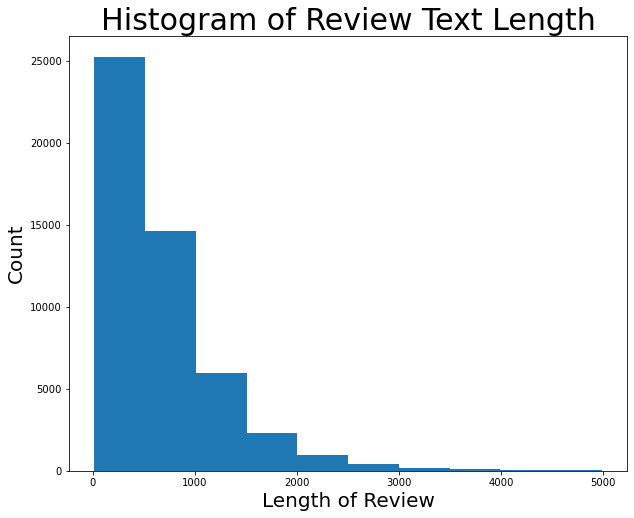

In [42]:
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.rc('axes', titlesize=30) 
plt.rc('axes', labelsize=20) 
plt.hist(df['review_text_length'])
plt.title('Histogram of Review Text Length')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.savefig('../images/histogram_review_text.png');

In [43]:
#Looking at the 10 shortest reviews
df.sort_values(by = ['review_text_length'], ascending = True).head(10)

,review_id,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length
23948,23948,The Codmother Fish & Chips,4.5,5,Great place! Yum!,17
17043,17043,Saigon Sandwich,4.5,1,Do not recommend Mitchell Towing!,33
18961,18961,Foreign Cinema,4.0,5,Amazing brunch spot to check out.,33
41877,41877,Philz Coffee,4.5,4,Mint mojito iced coffee was tasty,33
15177,15177,Golden Boy Pizza,4.5,4,Average slice of cheese pizza to-go,35
30047,30047,Espetus Churrascaria,4.0,5,"fantastic experience, mmm delicious",35
43621,43621,Plow,4.0,5,Super yummy lemon ricotta pancakes!!,36
38856,38856,Anchor Oyster Bar,4.5,5,"Long wait, but the freshest oysters in SF",41
10816,10816,Nopa,4.0,4,Good sized portions and friendly service!,41
29009,29009,Arizmendi Bakery,4.5,5,Their blueberry corn muffins are AMAZING!,41


In [44]:
# Looking at the 10 longest reviews
for row in df.sort_values(by = ['review_text_length'], ascending = False)['review_text'][0:10].iteritems():
    print(row, '\n')

(16796, "Perhaps no restaurant represents pizza in San Francisco's North Beach neighborhood better than Tony's Pizza Napoletana, which has been slinging pies for a full ten years now on the corner of Stockton and Union Streets catty corner to the historic Washington Square Park. The wait times and lines have been out the door for years now thanks to their signature Neapolitan pies that have been awards ever since they've opened. In my many times that I have been here there has never been a time in which I have waited at least a hour or longer for a table. But thankfully thanks for Yelp reservations, the wait times have been dramatically cut down in time. For the evening I went a Monday evening, we only had to wait roughly half an hour. I did try to do investigating to see if they were operating under regular hours since the Monday my party of five wanted to go was actually a holiday, but unfortunately the host service at Tony's isn't very good as the phone rings and rings, and when you

In [45]:
df.groupby(by = ['restaurant_name'])['review_text_length'].mean()

restaurant_name
Anchor Oyster Bar                    656.426
Arizmendi Bakery                     556.746
Beretta                              675.965
Brenda's French Soul Food            690.931
Burma Superstar                      703.577
Chapeau                              936.097
Chez Maman East                      613.987
Daeho Kalbijjim & Beef Soup          770.515
Dumpling Time                        757.539
El Farolito                          560.587
Espetus Churrascaria                 734.107
Farmhouse Kitchen Thai Cuisine       718.716
Fog Harbor Fish House                520.974
Foreign Cinema                       841.654
Gary Danko                          1163.119
Golden Boy Pizza                     544.663
Good Mong Kok Bakery                 618.963
HRD                                  690.617
Hog Island Oyster                    645.026
House of Prime Rib                   812.614
Kitchen Story                        754.631
Kokkari Estiatorio                   74

## Create sentences from each of the reviews

In [46]:
nlp = spacy.load('en_core_web_md')

In [47]:
#Creating a list of sentences from the review using spacey

def create_sentences_from_review(review, nlp):

    spacey_doc = nlp(review)
    
    return [str(sent) for sent in spacey_doc.sents]

In [49]:
# Creating new column sentences (list of sentences)

df['sentences'] = df['review_text'].apply(lambda x: create_sentences_from_review(x, nlp))

In [50]:
df.head()

,review_id,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length,sentences
0,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"[Absolutely amazing., I've dined here at least..."
1,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"[So good we went twice in one week!, After a r..."
2,2,Brenda's French Soul Food,4.0,2,Hadn't been here in years because the neighbor...,461,[Hadn't been here in years because the neighbo...
3,3,Brenda's French Soul Food,4.0,3,I love the other Brenda's in SF but this one d...,753,[I love the other Brenda's in SF but this one ...
4,4,Brenda's French Soul Food,4.0,5,Another repeat visit and no disappointment fro...,497,[Another repeat visit and no disappointment fr...


In [51]:
# Creating column sentence count

df['sentence_count'] = df['sentences'].apply(lambda x: len(x))

# Looking at total amount of sentences

df['sentence_count'].sum()

469122

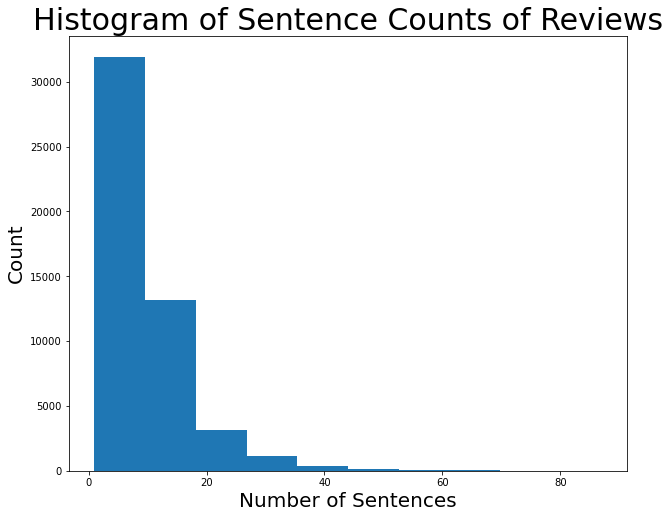

In [53]:
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.rc('axes', titlesize=30) 
plt.rc('axes', labelsize=20) 
plt.hist(df['sentence_count'])
plt.title('Histogram of Sentence Counts of Reviews')
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.savefig('../images/histogram_sentence_count.png');

In [54]:
df.describe()

,review_id,restaurant_rating,customer_rating,review_text_length,sentence_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,4.250000,4.319740,677.262140,9.382440
std,14433.901067,0.287231,1.018669,596.437954,7.460794
min,0.000000,4.000000,1.000000,17.000000,1.000000
25%,12499.750000,4.000000,4.000000,262.000000,4.000000
50%,24999.500000,4.000000,5.000000,507.000000,7.000000
75%,37499.250000,4.500000,5.000000,893.000000,12.000000
max,49999.000000,5.000000,5.000000,4986.000000,87.000000


In [55]:
def create_sentence_df(df):
    """Creates rows for each sentence for each review"""
    
    #Loops through every row
    for index, row in df.iterrows():
        
        # Creates x duplicates where x is the sentence_count
        dup_rows = pd.DataFrame(np.repeat([row.values],
                                          [row['sentence_count']],
                                          axis = 0),
                                columns = df.columns)

        # Populates the duplicates with the sentences from the curent row
        for idx, sent in zip(dup_rows.index, (row['sentences'])):
            dup_rows.iloc[idx]['sentence'] = sent

        # Concatenates duplicates back to the original df
        df = pd.concat([df, dup_rows])
    
    # resets the index since duplicates were added
    df.reset_index(inplace = True, drop = True)
    # Dropping all of original rows where sentence is blank
    df.drop(df[df['sentence'] == ""].index, inplace = True)
    return df

In [56]:
# Using the index column to create review id's
df['review_id'] = df.index
# Creating empty sentence column
df['sentence'] = ""
df = create_sentence_df(df)

In [57]:
df.shape

(469122, 9)

- 469122 sentences created from 50_000 reviews

In [58]:
df.to_csv(f'../data/San_Francisco_restaurant_reviews_sentences.csv')

## Creating sentence Dataframe for the 5 restaurants with all their reviews

In [59]:
five_rest_df = pd.read_csv('../data/San_Francisco_restaurant_reviews_first_5.csv')

# Dropping column
five_rest_df.rename({'Unnamed: 0':'review_id'})

# Removing html characters
remove_html_characters(five_rest_df)

# Creating sentences with spacey
five_rest_df['sentences'] = five_rest_df['review_text'].apply(lambda x: create_sentences_from_review(x, nlp))

# Creating sentence count for each review
five_rest_df['sentence_count'] = five_rest_df['sentences'].apply(lambda x: len(x))
print(five_rest_df['sentence_count'].sum())

# Using the index column to create review id's
five_rest_df['review_id'] = five_rest_df.index

# Creating empty sentence column
five_rest_df['sentence'] = ""

# Creating rows for each individual sentence
five_rest_df = create_sentence_df(five_rest_df)

# Saving the 
five_rest_df.to_csv(f'../data/San_Francisco_restaurant_reviews_first_5_sentences.csv')

389760
